# ......................Applied Data Science Capstone Project (Coursera).....................

In [83]:

!pip install geopy
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib
!pip install requests
!conda install -c conda-forge geopy --yes 
!pip install requests


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [1]:
import pandas as pd
import numpy as np
import requests
import csv
from bs4 import BeautifulSoup

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


from geopy.geocoders import Nominatim

import requests
import csv
from bs4 import BeautifulSoup

In [2]:
print("Hello Capstone Project Course")

Hello Capstone Project Course


In [ ]:
!wget -q -O 'london.html' https://en.wikipedia.org/wiki/List_of_areas_of_London
print('Data downloaded!')

In [ ]:
with open('london.html') as html_file:
    soup = BeautifulSoup(html_file,'lxml')
Title = soup.title.text
print(Title)

In [6]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_areas_of_London').text
soup = BeautifulSoup(source,'lxml')
#print(soup.prettify())

In [8]:
table = soup.find('table', class_='wikitable sortable')
#print(table.prettify)

In [9]:
text = table.tbody.text
#print(text)

str

In [10]:
text = text.splitlines()
print(text)

['', 'Location', 'London\xa0borough', 'Post town', 'Postcode\xa0district', 'Dial\xa0code', 'OS grid ref', '', '', 'Abbey Wood', 'Bexley,  Greenwich [7]', 'LONDON', 'SE2', '020', 'TQ465785', '', '', 'Acton', 'Ealing, Hammersmith and Fulham[8]', 'LONDON', 'W3, W4', '020', 'TQ205805', '', '', 'Addington', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ375645', '', '', 'Addiscombe', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ345665', '', '', 'Albany Park', 'Bexley', 'BEXLEY, SIDCUP', 'DA5, DA14', '020', 'TQ478728', '', '', 'Aldborough Hatch', 'Redbridge[9]', 'ILFORD', 'IG2', '020', 'TQ455895', '', '', 'Aldgate', 'City[10]', 'LONDON', 'EC3', '020', 'TQ334813', '', '', 'Aldwych', 'Westminster[10]', 'LONDON', 'WC2', '020', 'TQ307810', '', '', 'Alperton', 'Brent[11]', 'WEMBLEY', 'HA0', '020', 'TQ185835', '', '', 'Anerley', 'Bromley[11]', 'LONDON', 'SE20', '020', 'TQ345695', '', '', 'Angel', 'Islington[8]', 'LONDON', 'EC1, N1', '020', 'TQ345665', '', '', 'Aperfield', 'Bromley[11]', 'WESTERHAM', 'TN16

In [11]:
while("" in text) : 
    text.remove("") 
print(text)

['Location', 'London\xa0borough', 'Post town', 'Postcode\xa0district', 'Dial\xa0code', 'OS grid ref', 'Abbey Wood', 'Bexley,  Greenwich [7]', 'LONDON', 'SE2', '020', 'TQ465785', 'Acton', 'Ealing, Hammersmith and Fulham[8]', 'LONDON', 'W3, W4', '020', 'TQ205805', 'Addington', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ375645', 'Addiscombe', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ345665', 'Albany Park', 'Bexley', 'BEXLEY, SIDCUP', 'DA5, DA14', '020', 'TQ478728', 'Aldborough Hatch', 'Redbridge[9]', 'ILFORD', 'IG2', '020', 'TQ455895', 'Aldgate', 'City[10]', 'LONDON', 'EC3', '020', 'TQ334813', 'Aldwych', 'Westminster[10]', 'LONDON', 'WC2', '020', 'TQ307810', 'Alperton', 'Brent[11]', 'WEMBLEY', 'HA0', '020', 'TQ185835', 'Anerley', 'Bromley[11]', 'LONDON', 'SE20', '020', 'TQ345695', 'Angel', 'Islington[8]', 'LONDON', 'EC1, N1', '020', 'TQ345665', 'Aperfield', 'Bromley[11]', 'WESTERHAM', 'TN16', '01959', 'TQ425585', 'Archway', 'Islington[12]', 'LONDON', 'N19', '020', 'TQ285875', 'Ardleigh Gr

In [12]:
del text[324:329]

In [13]:
del text[1398:1403]

In [14]:
N=6
subList = [text[n:n+N] for n in range(0, len(text), N)]    
print(subList)

[['Location', 'London\xa0borough', 'Post town', 'Postcode\xa0district', 'Dial\xa0code', 'OS grid ref'], ['Abbey Wood', 'Bexley,  Greenwich [7]', 'LONDON', 'SE2', '020', 'TQ465785'], ['Acton', 'Ealing, Hammersmith and Fulham[8]', 'LONDON', 'W3, W4', '020', 'TQ205805'], ['Addington', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ375645'], ['Addiscombe', 'Croydon[8]', 'CROYDON', 'CR0', '020', 'TQ345665'], ['Albany Park', 'Bexley', 'BEXLEY, SIDCUP', 'DA5, DA14', '020', 'TQ478728'], ['Aldborough Hatch', 'Redbridge[9]', 'ILFORD', 'IG2', '020', 'TQ455895'], ['Aldgate', 'City[10]', 'LONDON', 'EC3', '020', 'TQ334813'], ['Aldwych', 'Westminster[10]', 'LONDON', 'WC2', '020', 'TQ307810'], ['Alperton', 'Brent[11]', 'WEMBLEY', 'HA0', '020', 'TQ185835'], ['Anerley', 'Bromley[11]', 'LONDON', 'SE20', '020', 'TQ345695'], ['Angel', 'Islington[8]', 'LONDON', 'EC1, N1', '020', 'TQ345665'], ['Aperfield', 'Bromley[11]', 'WESTERHAM', 'TN16', '01959', 'TQ425585'], ['Archway', 'Islington[12]', 'LONDON', 'N19', '020

In [15]:
London = pd.DataFrame(subList,columns=('Neighborhoods','Borough', 'Town','Postcode','Dial Code','OS grid ref'),)
London= London.iloc[1:]
London[0:5]

,Neighborhoods,Borough,Town,Postcode,Dial Code,OS grid ref
1,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
2,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
3,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
4,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
5,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [16]:
London['Borough'] =  London['Borough'].apply(lambda x: x.replace('[','').replace(']','')) 
London['Borough'] =  London['Borough'].str.replace('\d+', '')
London['Borough'] =  London['Borough'].str.split(',').str[0]
London['Postcode'] =  London['Postcode'].str.split(',').str[0]
London['Postcode'] =  London['Postcode'].str.split('(').str[0]
London['Town'] =  London['Town'].str.split(',').str[0]
London.head()

,Neighborhoods,Borough,Town,Postcode,Dial Code,OS grid ref
1,Abbey Wood,Bexley,LONDON,SE2,020,TQ465785
2,Acton,Ealing,LONDON,W3,020,TQ205805
3,Addington,Croydon,CROYDON,CR0,020,TQ375645
4,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
5,Albany Park,Bexley,BEXLEY,DA5,020,TQ478728


In [17]:
#Getting the count of every town mentioned 
London["Town"].value_counts() 

In [18]:
#Counting the town to just London
London[London["Town"] == "LONDON"].shape

(305, 6)

In [22]:
#Downloading and importing the package of geocoder 
!conda install -c conda-forge geocoder --yes 
import geocoder    

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

    geocoder: 1.38.1-py_1 conda-forge
    ratelim:  0.1.6-py_2  conda-forge


geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [23]:
#Defining the function for geopy library to get latitude and longitude for all the neighborhoods
def getNeighborhoodLatLong(Postcode,Borough,Neighborhoods):
    
    #Neighborhood with lat , long
    latlang = []
    # defining the user agent for geopy
    geolocator = Nominatim(user_agent="London")
    
    # for every unique combination of Neighborhood and Borough get the lattitude and longitude
    for postcode, borough, neigh in zip(Postcode,Borough,Neighborhoods):
        address = str(postcode +"London, United Kingdom")
        location = geocoder.arcgis(address)
        latlang.append(
        location.latlng
        )
    
    return(latlang)

In [24]:
london = getNeighborhoodLatLong( Postcode = London["Postcode"],
                                      Borough = London["Borough"],
                                      Neighborhoods = London["Neighborhoods"]
)

In [27]:
# We got the latitide and longitude for each of the postal code now lets merge it to our neighborhoods

# Since our cordinates are combines lets split them into two lists of latitude and longitude.
latitude= []
longitude = []
for lat, lng in london:
    latitude.append(lat)
    longitude.append(lng)

print(latitude[0:5])
print(longitude[0:5])

[53.40838660500003, 53.40838660500003, 53.40838660500003, 53.40838660500003, 53.40838660500003]
[-1.9695595439999352, -1.9695595439999352, -1.9695595439999352, -1.9695595439999352, -1.9695595439999352]


In [29]:
# Now that we have got the latitude and logitude lists we can just put them in our dataframe.
London["Latitude"] = latitude
London["Longitude"] = longitude

London.head()

,Neighborhoods,Borough,Town,Postcode,Dial Code,OS grid ref,Latitude,Longitude
1,Abbey Wood,Bexley,LONDON,SE2,020,TQ465785,53.408387,-1.96956
2,Acton,Ealing,LONDON,W3,020,TQ205805,53.408387,-1.96956
3,Addington,Croydon,CROYDON,CR0,020,TQ375645,53.408387,-1.96956
4,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665,53.408387,-1.96956
5,Albany Park,Bexley,BEXLEY,DA5,020,TQ478728,53.408387,-1.96956


In [234]:
London.shape

(491, 5)

In [236]:
# Check for the null values within the table
London.isna().sum()

Location             0
London Borough       0
latitude             0
longitude            0
Postcode District    0
dtype: int64

In [237]:
# Checking if the postcode is unique for all teh rows
print("Normal Non Unique shape of dataframe : ",London['Postcode District'].shape)

print("Unique shape of Postcodes in dataframe : ",London['Postcode District'].unique().shape)

Normal Non Unique shape of dataframe :  (491,)
Unique shape of Postcodes in dataframe :  (198,)


In [31]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


branca-0.4.0         | 26 KB     | ##################################### | 1

In [33]:
# create map of Lomdon using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10.55)

# add markers to map
for lat, lng, borough, neighborhood in zip(London['Latitude'], London['Longitude'], London['Borough'], London['Neighborhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
map_london

# Retrieving the London Venues from Foursquare

In [94]:
CLIENT_ID = 'RKWBSTT4NJNIGXG1C3T2EISYFYXKAONXXCLKL0CR4R3G4QSU' # your Foursquare ID
CLIENT_SECRET = 'HSGVYENZ1GYNHSV4FCTDAYMAX4F4LPOCYFTJ5SZQU2CXBZIS' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RKWBSTT4NJNIGXG1C3T2EISYFYXKAONXXCLKL0CR4R3G4QSU
CLIENT_SECRET:HSGVYENZ1GYNHSV4FCTDAYMAX4F4LPOCYFTJ5SZQU2CXBZIS


## Top 100 venues within the neighborhoods of London for within 500m radius

In [95]:
# Setting a limit for a easier and pliable work on the dataframe

LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=5000):

    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([
            (name, lat, lng, v['venue']['name'], v['venue']['location']['lat'],
             v['venue']['location']['lng'],
             v['venue']['categories'][0]['name']) for v in results
        ])

    nearby_venues = pd.DataFrame(
        [item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
        'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
        'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'
    ]

    return (nearby_venues)

In [96]:
l_venues = getNearbyVenues(names=London['Neighborhoods'],
                                latitudes=London['Latitude'],
                                longitudes=London['Longitude'])

Abbey Wood
Acton
Addington
Addiscombe
Albany Park
Aldborough Hatch
Aldgate
Aldwych
Alperton
Anerley
Angel
Aperfield
Archway
Ardleigh Green
Arkley
Arnos Grove
Balham
Bankside
Barbican
Barking
Barkingside
Barnehurst
Barnes
Barnes Cray
Barnet Gate
Barnet (also Chipping Barnet, High Barnet)
Barnsbury
Battersea
Bayswater
Beckenham
Beckton
Becontree
Becontree Heath
Beddington
Bedford Park
Belgravia
Bellingham
Belmont
Belmont
Belsize Park
Belvedere
Bermondsey
Berrylands
Bethnal Green
Bexley (also Old Bexley, Bexley Village)
Bexleyheath (also Bexley New Town)
Bickley
Biggin Hill
Blackfen
Blackfriars
Blackheath
Blackheath Royal Standard
Blackwall
Bloomsbury
Botany Bay
Bounds Green
Bow
Bowes Park
Brentford
Brent Cross
Brent Park
Brimsdown
Brixton
Brockley
Bromley
Bromley (also Bromley-by-Bow)
Bromley Common
Brompton
Brondesbury
Brunswick Park
Bulls Cross
Burnt Oak
Burroughs, The
Camberwell
Cambridge Heath
Camden Town
Canary Wharf
Cann Hall
Canning Town
Canonbury
Carshalton
Castelnau
Castle Green

In [97]:
# Shape of the acquired Dataframe
print(l_venues.shape)
l_venues.head()

(11230, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Wood,53.408387,-1.96956,The Globe,53.439279,-1.960568,Pub
1,Abbey Wood,53.408387,-1.96956,The Sportsman Inn,53.377398,-1.934865,Pub
2,Abbey Wood,53.408387,-1.96956,Hayfield Camping and Caravanning Club Site,53.377748,-1.930182,Campground
3,Abbey Wood,53.408387,-1.96956,Pico Lounge,53.442371,-1.947281,Bar
4,Abbey Wood,53.408387,-1.96956,Manor Park,53.446916,-1.941104,Park


# Making use of the Word Cloud to better visualize the Popular venues 

In [49]:
from sklearn.cluster import KMeans
from PIL import Image
!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [52]:
import matplotlib.pyplot as plt

In [98]:
London_venue_categories = " ".join(
    venue for venue in l_venues["Venue Category"])
print("There are {} words in the combination of all review.".format(
    len(London_venue_categories)))

There are 107719 words in the combination of all review.


In [99]:
#Defiing the function for generating wordcloud
def generate_word_cloud(string):
    wordcloud = WordCloud(width=800, height=400,background_color="white").generate(string)
    fig= plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

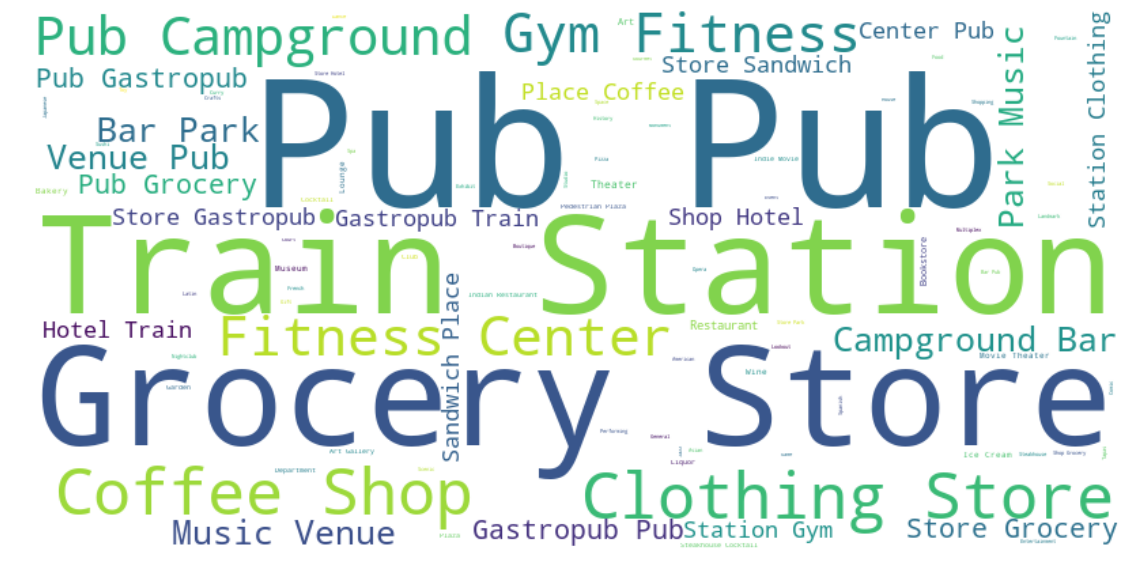

In [100]:
generate_word_cloud(London_venue_categories)

## Checking the size of london_venues we just got values for 43 unique neighborhoods insead of 208 neighborhoods

In [101]:
l_venues["Neighborhood"].value_counts().count()

525

In [102]:
London["Neighborhoods"].value_counts().count()

525

### So we will just keep data of 43 neighborhoods insted of 208 neighborhoods that we dont have data from foursqure api

In [103]:
London = London.loc[
    London["Neighborhoods"].isin(l_venues["Neighborhood"])]
London["Neighborhoods"].value_counts().count()

525

In [104]:
London.head()

,Neighborhoods,Borough,Town,Postcode,Dial Code,OS grid ref,Latitude,Longitude
1,Abbey Wood,Bexley,LONDON,SE2,020,TQ465785,53.408387,-1.96956
2,Acton,Ealing,LONDON,W3,020,TQ205805,53.408387,-1.96956
3,Addington,Croydon,CROYDON,CR0,020,TQ375645,53.408387,-1.96956
4,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665,53.408387,-1.96956
5,Albany Park,Bexley,BEXLEY,DA5,020,TQ478728,53.408387,-1.96956


### Now for further analysis we just have those neighborhoods which we have some venue data.

### Let's check how many venues were returned for each neighborhood

In [105]:
l_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbey Wood,21,21,21,21,21,21
Acton,21,21,21,21,21,21
Addington,21,21,21,21,21,21
Addiscombe,21,21,21,21,21,21
Albany Park,21,21,21,21,21,21
Aldborough Hatch,21,21,21,21,21,21
Aldgate,21,21,21,21,21,21
Aldwych,21,21,21,21,21,21
Alperton,21,21,21,21,21,21


In [106]:
print('There are {} uniques categories.'.format(len(l_venues['Venue Category'].unique())))

There are 64 uniques categories.


# Explore Each Neighborhood using k-means clustering¶

### For analysis using k means clustering we have to convert these venues categories into numerical form using dummies(one hot encoding)

In [107]:
# one hot encoding
london_onehot = pd.get_dummies(l_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = l_venues['Neighborhood'] 

london_onehot.head()

,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bookstore,Boutique,Campground,Clothing Store,...,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Theater,Toy / Game Store,Train Station,Wine Bar,Wine Shop,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbey Wood
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbey Wood
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Abbey Wood
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbey Wood
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbey Wood


In [108]:
london_onehot.shape

(11230, 65)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [109]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bookstore,Boutique,Campground,...,Spa,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Theater,Toy / Game Store,Train Station,Wine Bar,Wine Shop
0,Abbey Wood,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
1,Acton,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
2,Addington,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
3,Addiscombe,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
4,Albany Park,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
5,Aldborough Hatch,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
6,Aldgate,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
7,Aldwych,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
8,Alperton,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0
9,Anerley,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.0


### Let's print each neighborhood along with the top 5 most common venues¶


In [110]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbey Wood----
            venue  freq
0             Pub  0.29
1   Train Station  0.10
2       Gastropub  0.10
3   Grocery Store  0.10
4  Sandwich Place  0.05


----Acton----
            venue  freq
0             Pub  0.29
1   Train Station  0.10
2       Gastropub  0.10
3   Grocery Store  0.10
4  Sandwich Place  0.05


----Addington----
            venue  freq
0             Pub  0.29
1   Train Station  0.10
2       Gastropub  0.10
3   Grocery Store  0.10
4  Sandwich Place  0.05


----Addiscombe----
            venue  freq
0             Pub  0.29
1   Train Station  0.10
2       Gastropub  0.10
3   Grocery Store  0.10
4  Sandwich Place  0.05


----Albany Park----
            venue  freq
0             Pub  0.29
1   Train Station  0.10
2       Gastropub  0.10
3   Grocery Store  0.10
4  Sandwich Place  0.05


----Aldborough Hatch----
            venue  freq
0             Pub  0.29
1   Train Station  0.10
2       Gastropub  0.10
3   Grocery Store  0.10
4  Sandwich Place  0.05


----Aldga

## Let's put that into a pandas dataframe

### First, let's write a function to sort the venues in descending order.

In [111]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [112]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']


for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
1,Acton,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
2,Addington,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
3,Addiscombe,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
4,Albany Park,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel


# Clusterization

### Run k-means to cluster the neighborhood into 5 clusters.

In [113]:
#Set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [119]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = London

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

london_merged.head() # check the last columns!


,Neighborhoods,Borough,Town,Postcode,Dial Code,OS grid ref,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Abbey Wood,Bexley,LONDON,SE2,020,TQ465785,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
2,Acton,Ealing,LONDON,W3,020,TQ205805,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
3,Addington,Croydon,CROYDON,CR0,020,TQ375645,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
4,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
5,Albany Park,Bexley,BEXLEY,DA5,020,TQ478728,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel


### Plotting Clusters

In [120]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighborhoods'], london_merged['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster + 1) + str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [121]:
# Deciding names for clustering using barcharts
tmp = london_merged.groupby("Cluster Labels")["1st Most Common Venue"]
fig = plt.figure(figsize=(10,4))
colormap = cm.rainbow(np.linspace(0, 1, pop_toronto_venues.shape[0]))
plt.title("Busiest Venues of London per culster")
tmp.value_counts().plot.bar(color = colormap)

NameError: name 'pop_toronto_venues' is not defined

<Figure size 720x288 with 0 Axes>

In [122]:
clus1 = london_merged.loc[
    london_merged['Cluster Labels'] == 0,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus1.head()

,Borough,OS grid ref,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [123]:
# for popups in map assigning the lists
dft_tmp_clus1 = pd.DataFrame(
    clus1.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus1.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus1["top_venues"].values

array([], dtype=float64)

### We can see that this cluster is famous for pubs and cafe seems like totaly go out place.

In [124]:
clus2 = london_merged.loc[
    london_merged['Cluster Labels'] == 1,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus2.head()

,Borough,OS grid ref,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
90,Sutton,TQ245625,51.50642,-0.12721,1,Hotel,Theater,Bookstore,Cocktail Bar,Lounge,Bakery,Clothing Store,Steakhouse,Park,Ice Cream Shop


In [125]:
# for popups in map assigning the lists
dft_tmp_clus2 = pd.DataFrame(
    clus2.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus2.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus2["top_venues"].values

array(['Hotel'], dtype=object)

### We can see this place is famous for Coffee shops, cafe and stores


In [126]:
clus3 = london_merged.loc[
    london_merged['Cluster Labels'] == 2,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus3.head()

,Borough,OS grid ref,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bexley,TQ465785,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
2,Ealing,TQ205805,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
3,Croydon,TQ375645,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
4,Croydon,TQ345665,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel
5,Bexley,TQ478728,53.408387,-1.96956,2,Pub,Train Station,Grocery Store,Gastropub,Campground,Coffee Shop,Gym / Fitness Center,Park,Bar,Hotel


In [127]:
# for popups in map assigning the lists
dft_tmp_clus3 = pd.DataFrame(
    clus3.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus3.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus3["top_venues"].values

array(['Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub',
       'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub',
       'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub',
       'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub', 'Pub',
       'Pub', 'Pub'], dtype=object)

### This cluster is all about food



In [128]:
clus4 = london_merged.loc[
    london_merged['Cluster Labels'] == 3,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus4.head()

,Borough,OS grid ref,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [129]:
# for popups in map assigning the lists
dft_tmp_clus4 = pd.DataFrame(
    clus4.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus4.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus4["top_venues"].values

array([], dtype=float64)

### This cluser is more about the public transit

In [130]:
clus5 = london_merged.loc[
    london_merged['Cluster Labels'] == 4,
    london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
clus5.head()

,Borough,OS grid ref,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [131]:
# for popups in map assigning the lists
dft_tmp_clus5 = pd.DataFrame(
    clus5.groupby("Borough")["1st Most Common Venue"].apply(
        lambda x: ','.join(x.unique())).reset_index())
dft_tmp_clus5.rename(columns={
    'Borough': 'boroughs',
    '1st Most Common Venue': 'top_venues'
},
                     inplace=True)
dft_tmp_clus5["top_venues"].values

array([], dtype=float64)

### This cluster is famous for grocery stores.

In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#folium.GeoJson(lon_json).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, top_spot, borough in zip(
        london_merged['Latitude'], london_merged['Longitude'],
        london_merged['Neighborhoods'], london_merged['Cluster Labels'],
        london_merged['1st Most Common Venue'], london_merged['Borough']):
    # putting the extra options to explore in each cluster on the popups
    if cluster == 0:
        label = folium.Popup("<h6> <center> Bus Stations </center></h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus1.loc[dft_tmp_clus1.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)
    elif cluster == 1:
        label = folium.Popup("<center>Pubs </center>\
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus2.loc[dft_tmp_clus2.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    elif cluster == 2:
        label = folium.Popup("<h6> <center> Pubs </center> </h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus3.loc[dft_tmp_clus3.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    elif cluster == 3:
        label = folium.Popup("<h6> <center> Grocery Stores </center> </h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus4.loc[dft_tmp_clus4.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    elif cluster == 4:
        label = folium.Popup("<h6> <center>Super Market </center> </h6> \
                             <h6><b> {}</b> : {}</h6> \
                          <h6> <b> {} </b> : {} </h6> ".format(
            str(poi), str(top_spot), str(borough),
            str(dft_tmp_clus5.loc[dft_tmp_clus5.boroughs == borough,
                                  "top_venues"].values)),
                             parse_html=False)

    folium.CircleMarker([lat, lon],
                        radius=7,
                        popup=label,
                        color=rainbow[cluster - 1],
                        fill=True,
                        fill_color=rainbow[cluster - 1],
                        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [238]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
address = 'London, UK'
!pip install geopy
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [239]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)
map_london

NameError: name 'folium' is not defined

In [174]:
ny_data = Toronto[Toronto['Borough'] == 'North York'].reset_index(drop=True)
ny_data

,Postal Code,Latitude,Longitude,Borough,Neighborhood
0,M2H,43.803762,-79.363452,North York,Hillcrest Village
1,M2J,43.778517,-79.346556,North York,"Henry Farm,Oriole,Fairview"
2,M2K,43.786947,-79.385975,North York,Bayview Village
3,M2L,43.757490,-79.374714,North York,"Silver Hills,York Mills"
4,M2M,43.789053,-79.408493,North York,"Willowdale,Newtonbrook"
5,M2N,43.770120,-79.408493,North York,Willowdale South
6,M2P,43.752758,-79.400049,North York,York Mills West
7,M2R,43.782736,-79.442259,North York,Willowdale West
8,M3A,43.753259,-79.329656,North York,Parkwoods
9,M3B,43.745906,-79.352188,North York,Don Mills North


In [175]:
address = 'North York, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York are 43.7543263, -79.4491169663959.


In [176]:
# create map of Manhattan using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ny_data['Latitude'], ny_data['Longitude'], ny_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny